In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MJ-19-1\\plots\\' # directory for output plots

In [2]:
####################################
#### load in all the gene lists ####
####################################

### edited 14.8.2019 to update to newest SE gene lists (taken from pause-initiation notebook)

SE_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\SE_464_genes.xlsx')
#SE_ctrl_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\SE_control_423_all.xlsx')

TF_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\TF_53_genes.xlsx')
#TF_ctrl_TFs = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\TF_control_51_onlyTFs.xlsx')
#TF_ctrl_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\TF_control_51_all.xlsx')

autoreg_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')
#CRC_ctrl_TFs = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_control_22_onlyTFs.xlsx')
#CRC_ctrl_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\CRC_control_22_all.xlsx')

In [4]:
######################################
#### grep genes from DEseq tables ####
######################################
# DEseq2 dataframe
DEseq_TT_1h_df = pd.read_csv('S:\\lab_winter\\martin\\MJ-19-1\\20190418_JaegerWinter2019TTseqKBM7\\DifferentialExpression\\differential.expression.estimates_1h.txt', sep="\t")

##### grep CRC genes #####
# use query to parse geneIDs from the DEseq result table. Need to use the '|'.join construct to use geneIDs as REGEX, where some TRxxx annotations have more than on gene_id
CRC_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]
# manually kill one of the RUNX1 annotations that is off...
CRC_DEseq = CRC_DEseq[CRC_DEseq.index != 'TR23076']
# grep control gene sets
CRC_ctrl_TFs_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(CRC_ctrl_TFs.geneID.tolist()), na=False)]
CRC_ctrl_genes_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(CRC_ctrl_genes.geneID.tolist()), na=False)]

##### same for 51 TF SE-genes #####
TF_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]
TF_DEseq = TF_DEseq[TF_DEseq.index != 'TR23076']
# now the control genes
TF_ctrl_TFs_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(TF_ctrl_TFs.geneID.tolist()), na=False)]
# here we lose one gene
TF_ctrl_genes_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(TF_ctrl_genes.geneID.tolist()), na=False)]

##### same for 423 SE genes; unfortunately we lose one gene (not contained in the TT-seq annotation) #####
SE_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]
SE_ctrl_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(SE_ctrl_genes.geneID.tolist()), na=False)]

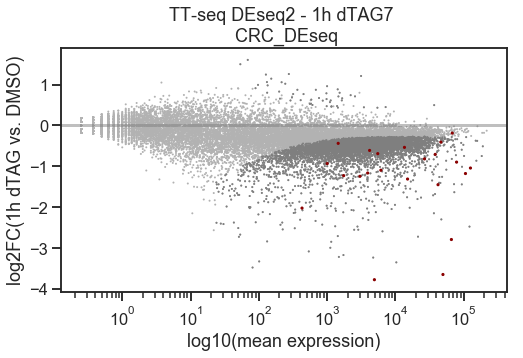

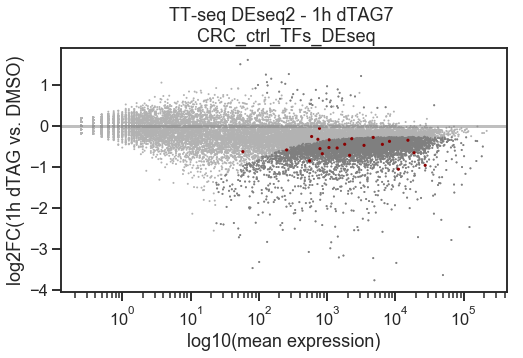

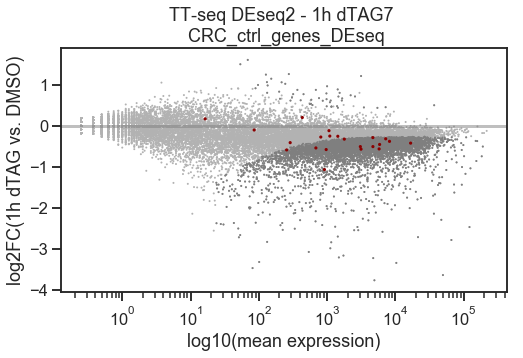

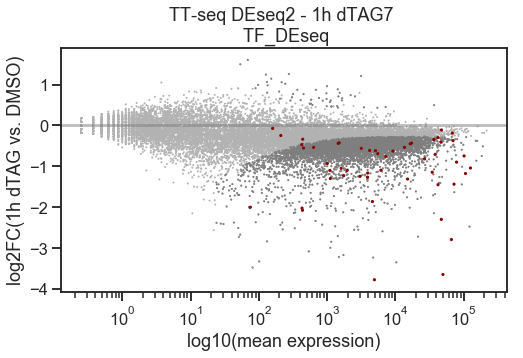

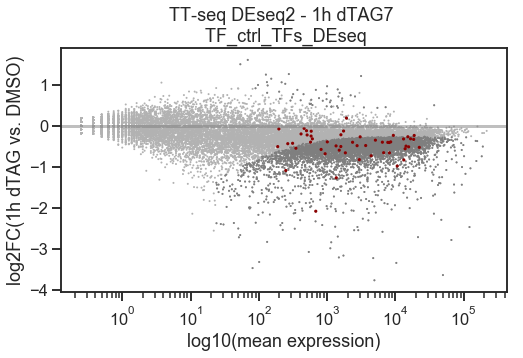

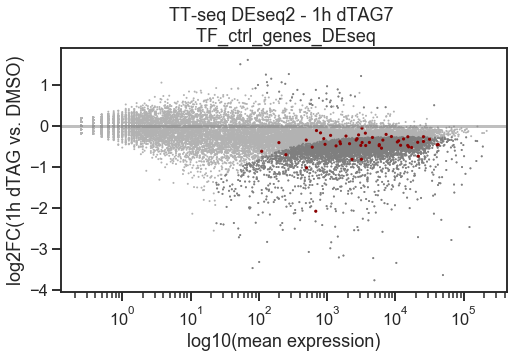

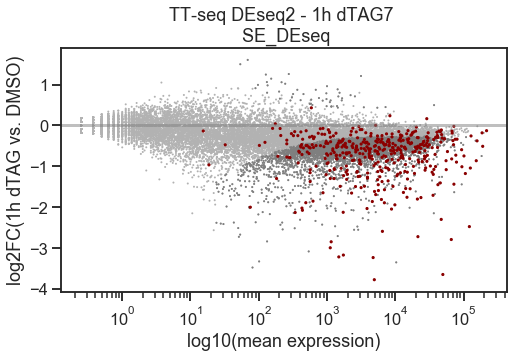

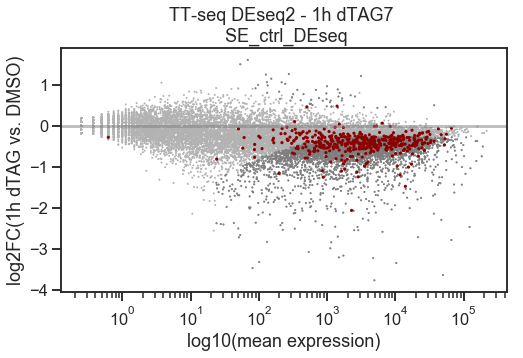

In [4]:
####################################
#### plot all sets individually ####
####################################
all_sets = [CRC_DEseq, CRC_ctrl_TFs_DEseq, CRC_ctrl_genes_DEseq, TF_DEseq, TF_ctrl_TFs_DEseq, TF_ctrl_genes_DEseq, SE_DEseq, SE_ctrl_DEseq]
all_set_names = ["CRC_DEseq", "CRC_ctrl_TFs_DEseq", "CRC_ctrl_genes_DEseq", "TF_DEseq", "TF_ctrl_TFs_DEseq", "TF_ctrl_genes_DEseq", "SE_DEseq", "SE_ctrl_DEseq"]

counter = 0
for geneset in all_sets:
    # make the plots
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(8,4.5))

    # for plotting kernel density colormap
    #xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
    #z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.scatter(x=DEseq_TT_1h_df.baseMean, y=DEseq_TT_1h_df.log2FoldChange, s=4, c="#b2b2b2", edgecolors="none")
    plt.scatter(x=DEseq_TT_1h_df.baseMean[DEseq_TT_1h_df.padj < 0.01], y=DEseq_TT_1h_df.log2FoldChange[DEseq_TT_1h_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
    plt.scatter(x=geneset.baseMean, y=geneset.log2FoldChange, s=10, c="darkred", edgecolors="none")
    plt.axhline(color="grey",alpha=0.5, linewidth=3)

    # formatting
    plt.xscale('log')
    plt.title('TT-seq DEseq2 - 1h dTAG7 \n {0}'.format(all_set_names[counter]))
    plt.xlabel('log10(mean expression)')
    plt.ylabel('log2FC(1h dTAG vs. DMSO)')

    # save
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.png'.format(all_set_names[counter]), dpi=300)
    counter += 1
    plt.show()

In [5]:
##########################################
#### get genes for GO-term enrichment ####
##########################################
all_IDs = DEseq_TT_1h_df.gene_id.dropna().tolist()

clean_all = []
for x in all_IDs:
    entry = x.replace('NA','').strip()
    if len(entry.split(" ")) > 1:
        for i in range(len(entry.split(" "))):
            clean_all.append(entry.split(" ")[i])
    else:
        clean_all.append(entry)
clean_all = set(clean_all)
clean_all = pd.DataFrame(list(clean_all), columns=['geneID'])

#clean_all.to_excel("S:\\lab_winter\\martin\\MJ-19-1\\data\\TT-seq_DE_1h_all_ENSEMBL_IDs.xlsx")

# downregulated (padj < 0.001 & log2FC < -0.5)
crude_down = DEseq_TT_1h_df[(DEseq_TT_1h_df.padj < 0.001) & (DEseq_TT_1h_df.log2FoldChange < -0.5)].gene_id.dropna().tolist()

clean_down = []
for x in crude_down:
    entry = x.replace('NA','').strip()
    if len(entry.split(" ")) > 1:
        for i in range(len(entry.split(" "))):
            clean_down.append(entry.split(" ")[i])
    else:
        clean_down.append(entry)
clean_down = set(clean_down)
clean_down = pd.DataFrame(list(clean_down), columns=['geneID'])

#clean_down.to_excel("S:\\lab_winter\\martin\\MJ-19-1\\data\\TT-seq_DE_1h_3014_downregulated.xlsx")

In [6]:
##### make .rnk file for Broad Genepattern tool "GSEA_preranked" => col1=gene_ID | col2=log2FC

# this is a dictionary of ENSEMBL IDs which have a unique HGNC symbol (but one HGNC symbol can have multiple ENSEMBL IDs!)
ENSEMBL_to_HGNC = pd.read_csv("S:\\lab_winter\\reference_files\\geneID_dictionaries\\ENSEMBL-Gene-Stable-ID_to_HGNC-Symbol.txt", sep="\t")
ENSEMBL_to_HGNC.columns = ['ENSG', 'HGNC']
ENSEMBL_to_HGNC = ENSEMBL_to_HGNC.drop_duplicates('ENSG').set_index('ENSG', verify_integrity=True) # we lose 7 IDs because they occur more than once



# get log2FC for each geneID
rank_df = DEseq_TT_1h_df[['gene_id','log2FoldChange']].dropna()

#this gets only the downregulated genes
#rank_df = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(clean_down.geneID.tolist()), na=False)][['gene_id','log2FoldChange']]

def strip(str):
    clean = str.replace('NA', '').strip()
    return clean

rank_df['clean_ID'] = rank_df.gene_id.apply(strip)
rank_df = rank_df.loc[:,['clean_ID', 'log2FoldChange']]

# here we explode rows with multiple geneIDs into separate rows => now exactly 1 ID per row, but several IDs occur more than once
rank_df = rank_df.set_index(rank_df.columns.drop('clean_ID',1).tolist()).clean_ID.str.split(' ', expand=True).stack().reset_index().rename(columns={0:'clean_ID'}).loc[:, rank_df.columns]
# remove lines without ENSG ID
rank_df = rank_df[rank_df.clean_ID.str.contains('ENSG')]
# get the HGNC gene name for each ENSEMBL ID
rank_df = rank_df.join(ENSEMBL_to_HGNC, on='clean_ID')
# remove entries without HGNC name
rank_df = rank_df[~rank_df.HGNC.isnull()]

######### here it starts getting arbitrary => first I remove ENSEMBL IDs which don't have an HGNC Symbol; then I'm resolving duplicated geneIDs by retaining those with lowest log2FC; then I arbitrarily keep the first occuring geneID for IDs with the exact same log2FC

# boil down HGNC IDs, retaining the one with minimal log2FC for those which occur more than once
rank_df = rank_df.groupby('HGNC').min()
# kick out HGNCs which have the exact same log2FC; retaining the first occuring HGNC in this case
rank_df = pd.DataFrame(rank_df.log2FoldChange.drop_duplicates())

#rank_df.to_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\TT-seq_1h_all_16104_log2FC_ranked_for_GSEA.rnk", sep="\t", header=False) #### this file is used as input for Broad's GenePattern tool (GSEApreranked module with standard settings)

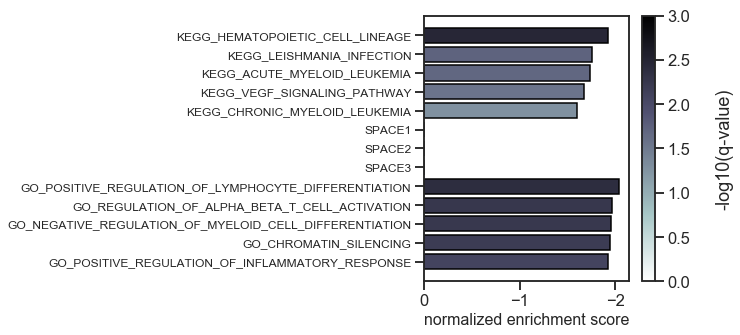

In [7]:
#################################
#### make GO-term/GSEA plots ####
#################################
# load the data
KEGG_pathway = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\KEGG_pathway_GSEA.xls", sep="\t")
KEGG_pathway = KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

GO_process = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\GO_PROCESS_GSEA.xls", sep="\t")
GO_process = GO_process.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

GO_function = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\GO_FUNCTION_GSEA.xls", sep="\t")
GO_function = GO_function.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

GO_component = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\GO_COMPONENT_GSEA.xls", sep="\t")
GO_component = GO_component.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

GSEA_hallmarks = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\Hallmarks_GSEA.xls", sep="\t")
GSEA_hallmarks = GSEA_hallmarks.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

GSEA_TFs = pd.read_csv("S:\\lab_winter\\martin\\MJ-19-1\\data\\GO_term_enrichment_1h\\GSEA_for_downregulated\\TF_motifs.xls", sep="\t")
GSEA_TFs = GSEA_TFs.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

# playing with filters
KEGG_pathway = KEGG_pathway[(KEGG_pathway.SIZE > 50) & (KEGG_pathway.SIZE < 75)] # this is optimal to get cell identity => take top 5 sets!
GO_process = GO_process[(GO_process.SIZE > 50) & (GO_process.SIZE < 75)] # this is optimal to get cell identity => take top 5 sets!
GO_function = GO_function[GO_function.SIZE > 75]

###### prepare the plot
KEGG_pathway['logFDR'] = -1 * np.log10(KEGG_pathway.q_value)
GO_process['logFDR'] = -1 * np.log10(GO_process.q_value)

# stitch together the individual dataframes
spacer_df = pd.DataFrame(0,index = ['SPACE1','SPACE2','SPACE3'], columns = KEGG_pathway.columns)
plot_df = KEGG_pathway[:5].append(spacer_df)
plot_df = plot_df.append(GO_process[:5])

# set colormap maximum to up-rounded logFDR
norm = mpl.colors.Normalize(vmin = 0., vmax = math.ceil(max(plot_df['logFDR'])))
plot_df['color'] = list(plt.cm.bone_r(norm(list(plot_df['logFDR']))))

##### finally plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

f = plt.barh(range(len(plot_df)), plot_df['NES'], color = plot_df['color'], edgecolor = ['k' for i in plot_df.index])

plt.yticks(range(len(plot_df)), list(plot_df.index), fontsize = 12)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel('normalized enrichment score', fontsize = 16)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.get_cmap('bone_r'), norm=norm)
sm.set_array([])
plt.colorbar(sm).set_label('-log10(q-value)', rotation=90,labelpad=25)

plt.tight_layout()

plt.show()
#plt.savefig(plots_dir + 'GSEA_plots\\Stringent_GSEA_top5_BoneR.pdf', dpi=300)
#plt.savefig(plots_dir + 'GSEA_plots\\Stringent_GSEA_top5_BoneR.png', dpi=300)

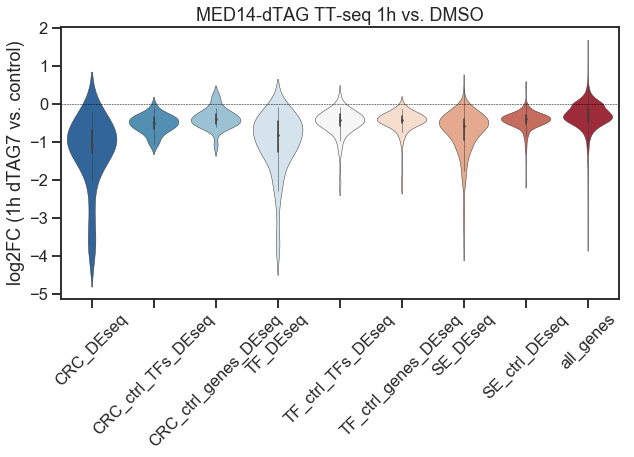

CRC vs. CRC_ctrl_genes MannwhitneyuResult(statistic=51.0, pvalue=3.883001548907498e-06)
CRC vs. CRC_ctrl_TFs MannwhitneyuResult(statistic=82.0, pvalue=9.059870183695398e-05)
CRC vs. all_genes MannwhitneyuResult(statistic=39961.0, pvalue=1.9060039267944225e-11)


SE_TF vs. CRC_ctrl_genes MannwhitneyuResult(statistic=553.0, pvalue=4.775155545922099e-07)
SE_TF vs. CRC_ctrl_genes MannwhitneyuResult(statistic=628.0, pvalue=3.4378688309873227e-06)
SE_TF vs. CRC_ctrl_genes MannwhitneyuResult(statistic=156956.5, pvalue=1.2755434931794517e-17)


MannwhitneyuResult(statistic=55549.0, pvalue=1.57007456927075e-21)
MannwhitneyuResult(statistic=1911599.0, pvalue=6.0805177784249745e-80)


In [15]:
##########################
#### make violinplots ####
##########################
# make a wide-form df with log2FoldChanges
l2fc = pd.DataFrame()
l2fc['all_genes'] = DEseq_TT_1h_df.loc[:,'log2FoldChange']

all_sets = [CRC_DEseq, CRC_ctrl_TFs_DEseq, CRC_ctrl_genes_DEseq, TF_DEseq, TF_ctrl_TFs_DEseq, TF_ctrl_genes_DEseq, SE_DEseq, SE_ctrl_DEseq]
all_set_names = ["CRC_DEseq", "CRC_ctrl_TFs_DEseq", "CRC_ctrl_genes_DEseq", "TF_DEseq", "TF_ctrl_TFs_DEseq", "TF_ctrl_genes_DEseq", "SE_DEseq", "SE_ctrl_DEseq"]

counter = 0
for x in all_sets:
    l2fc[all_set_names[counter]] = x.log2FoldChange
    counter += 1

##### make the plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

reordered = ["CRC_DEseq", "CRC_ctrl_TFs_DEseq", "CRC_ctrl_genes_DEseq", "TF_DEseq", "TF_ctrl_TFs_DEseq", "TF_ctrl_genes_DEseq", "SE_DEseq", "SE_ctrl_DEseq", "all_genes"]

sns.violinplot(data=l2fc.reindex(reordered, axis=1), linewidth=0.5, scale="width", palette="RdBu_r")
plt.axhline(y=0, linestyle='dashed', linewidth=0.5, color="black")
plt.title('MED14-dTAG TT-seq 1h vs. DMSO')
plt.xticks(rotation=45)
plt.ylabel('log2FC (1h dTAG7 vs. control)')

plt.show()
#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_violin\\all_sets_1h_DE_violinplot.png', dpi=300)

# testing significance that distributions differ with Mann-Whitney-U
print "CRC vs. CRC_ctrl_genes", sc.stats.mannwhitneyu(l2fc.CRC_DEseq.dropna(), l2fc.CRC_ctrl_genes_DEseq.dropna()) # pvalue=3.8830015489074976e-06
print "CRC vs. CRC_ctrl_TFs", sc.stats.mannwhitneyu(l2fc.CRC_DEseq.dropna(), l2fc.CRC_ctrl_TFs_DEseq.dropna()) # pvalue=9.059870183695398e-05
print "CRC vs. all_genes", sc.stats.mannwhitneyu(l2fc.CRC_DEseq.dropna(), l2fc.all_genes.dropna()) # pvalue=1.9060039267944225e-11
print "\n"
print "SE_TF vs. CRC_ctrl_genes", sc.stats.mannwhitneyu(l2fc.TF_DEseq.dropna(), l2fc.TF_ctrl_genes_DEseq.dropna()) # pvalue=4.7751555459220994e-07
print "SE_TF vs. CRC_ctrl_genes", sc.stats.mannwhitneyu(l2fc.TF_DEseq.dropna(), l2fc.TF_ctrl_TFs_DEseq.dropna()) # pvalue=3.4378688309873227e-06
print "SE_TF vs. CRC_ctrl_genes", sc.stats.mannwhitneyu(l2fc.TF_DEseq.dropna(), l2fc.all_genes.dropna()) # pvalue=1.2755434931794517e-17
print "\n"
print sc.stats.mannwhitneyu(l2fc.SE_DEseq.dropna(), l2fc.SE_ctrl_DEseq.dropna()) # pvalue=1.5700745692707499e-21
print sc.stats.mannwhitneyu(l2fc.SE_DEseq.dropna(), l2fc.all_genes.dropna()) # pvalue=6.0805177784249745e-80

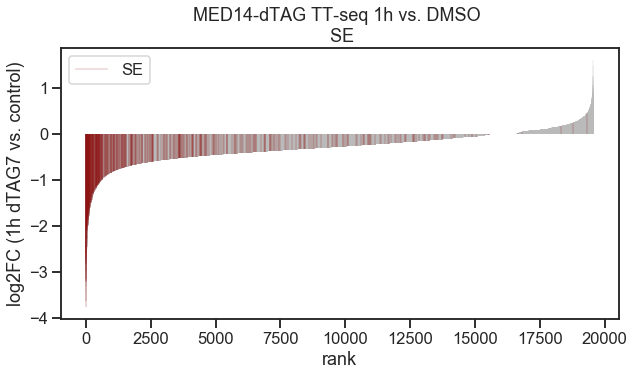

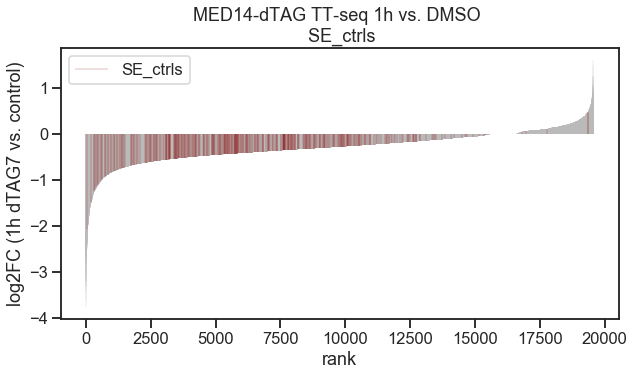

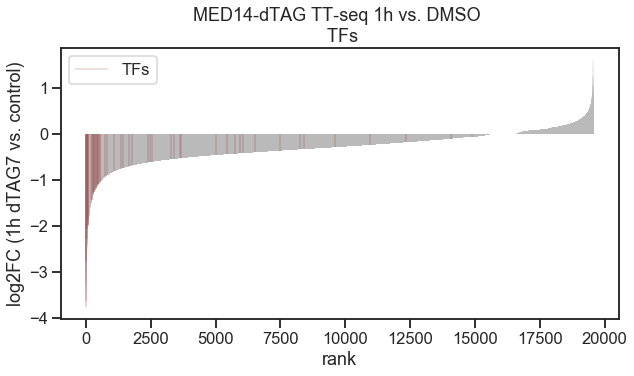

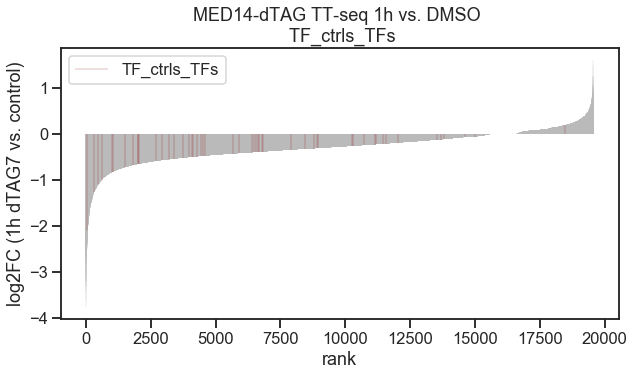

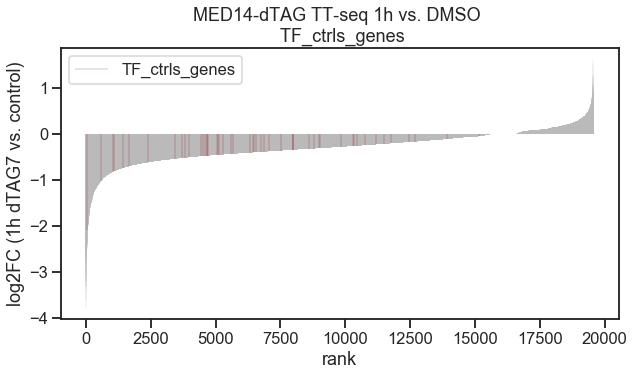

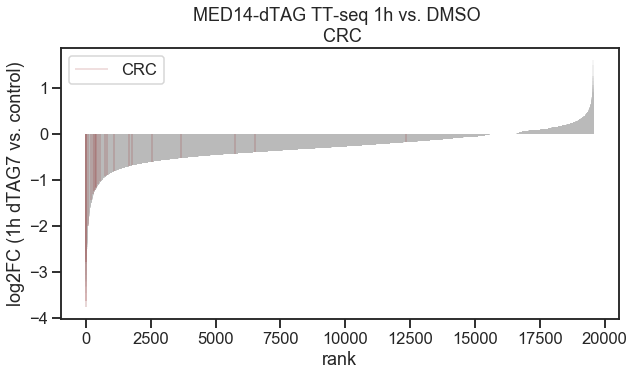

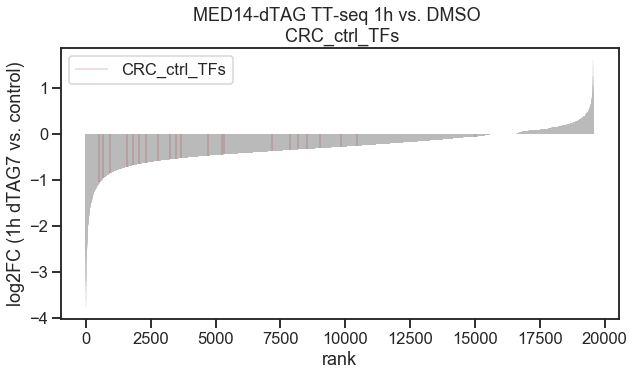

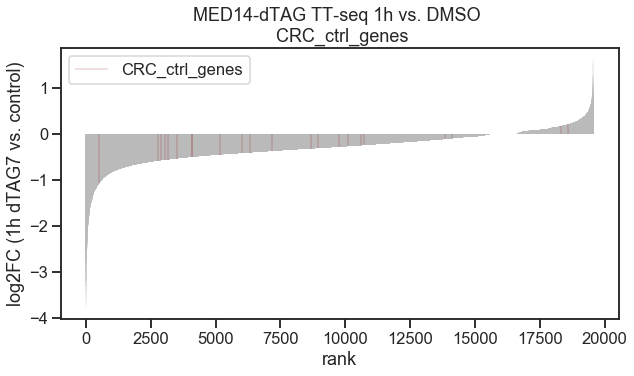

In [12]:
########################
#### make waterfall ####
########################
# significantly downregulated
#ascending = DEseq_TT_1h_df[(DEseq_TT_1h_df.padj < 0.001) & (DEseq_TT_1h_df.log2FoldChange < -0.5)].sort_values(by='log2FoldChange')
# all genes
ascending = DEseq_TT_1h_df.sort_values(by='log2FoldChange')
# add rank column
ascending['rank'] = np.arange(len(ascending.index))

# proxies for grepping the gene sets
SE_asc = ascending.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)
SE_ctrls_asc = ascending.gene_id.str.contains('|'.join(SE_ctrl_genes.geneID.tolist()), na=False)
TFs_asc = (ascending.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)) & (ascending.index != 'TR23076')
TF_ctrls_TFs_asc = ascending.gene_id.str.contains('|'.join(TF_ctrl_TFs.geneID.tolist()), na=False)
TF_ctrls_genes_asc = ascending.gene_id.str.contains('|'.join(TF_ctrl_genes.geneID.tolist()), na=False)
CRC_asc = (ascending.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)) & (ascending.index != 'TR23076')
CRC_ctrls_TFs_asc = ascending.gene_id.str.contains('|'.join(CRC_ctrl_TFs.geneID.tolist()), na=False)
CRC_ctrls_genes_asc = ascending.gene_id.str.contains('|'.join(CRC_ctrl_genes.geneID.tolist()), na=False)


all_sets = [SE_asc, SE_ctrls_asc, TFs_asc, TF_ctrls_TFs_asc, TF_ctrls_genes_asc, CRC_asc, CRC_ctrls_TFs_asc, CRC_ctrls_genes_asc]
all_set_names = ["SE", "SE_ctrls", "TFs", "TF_ctrls_TFs", "TF_ctrls_genes", "CRC", "CRC_ctrl_TFs", "CRC_ctrl_genes"]

##### make the plots individually
counter = 0
for geneset in all_sets:
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(10,5))

    plt.vlines(x=ascending['rank'], ymin=0, ymax=ascending['log2FoldChange'], linewidth=.25, color='#bababa')
    plt.vlines(x=ascending[geneset]['rank'], ymin=0, ymax=ascending[geneset]['log2FoldChange'], linewidth=.25, color='darkred', label='{0}'.format(all_set_names[counter]))
    #plt.vlines(x=ascending[TF_ascending]['rank'], ymin=0, ymax=ascending[TF_ascending]['log2FoldChange'], linewidth=.25, color='#6c00cc', label='TF_genes')
    #plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

    plt.xlabel('rank')
    plt.ylabel('log2FC (1h dTAG7 vs. control)')
    plt.title('MED14-dTAG TT-seq 1h vs. DMSO \n {0}'.format(all_set_names[counter]))
    plt.legend(loc=2)

    plt.show()
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.png'.format(all_set_names[counter]), dpi=300)
    counter += 1

In [100]:
"""
##### underlying code for manual plotting:
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

plt.vlines(x=ascending['rank'], ymin=0, ymax=ascending['log2FoldChange'], linewidth=.25, color='#bababa')
plt.vlines(x=ascending[CRC_asc]['rank'], ymin=0, ymax=ascending[CRC_asc]['log2FoldChange'], linewidth=.5, color='darkred', label='CRC_TFs')
plt.vlines(x=ascending[CRC_ctrls_genes_asc]['rank'], ymin=0, ymax=ascending[CRC_ctrls_genes_asc]['log2FoldChange'], linewidth=.5, color='black', label='control_genes')
#plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

plt.xlabel('rank')
plt.ylabel('log2FC (1h dTAG7 vs. control)')
plt.title('MED14-dTAG TT-seq 1h vs. DMSO')
plt.legend(loc=2)

#plt.show()
plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\CRC_with_ctrl_genes_1h_waterfall_all.pdf', dpi=300)
plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\CRC_with_ctrl_genes_1h_waterfall_all.png', dpi=300)
"""
print ""

In [160]:
##############################################
#### generate CRC network cytoscape input ####
##############################################
# first the node interactions as SIF format (each node targets all other nodes):
node_sif = pd.DataFrame(CRC_genes.gene_name).rename({'gene_name': 'source_node'}, axis=1)
node_sif['interaction'] = "pp"
node_sif["target_nodes"] = '\t'.join(CRC_genes.gene_name.tolist())

#node_sif.to_csv('S:\\lab_winter\\martin\\Mediator_CRC\\networks\\CRC_22_network_node_interactions.sif', sep="\t", header=False, index=False, doublequote=False)

# now node attributes:
CRC_annotated = pd.DataFrame(columns=CRC_DEseq.columns)
for gene in CRC_genes.geneID: #["ENSG00000070476", "ENSG00000136997"]:
    row = CRC_DEseq[CRC_DEseq.gene_id.str.contains(gene)]
    row.loc[row.index, 'single_ID'] = gene
    row.loc[row.index, 'gene_name'] = CRC_genes.loc[CRC_genes.geneID.str.contains(gene), 'gene_name'].values[0]
    CRC_annotated = CRC_annotated.append(row, sort=False)
    
#CRC_annotated.to_csv('S:\\lab_winter\\martin\\Mediator_CRC\\networks\\CRC_22_network_node_attributes.txt', sep="\t")

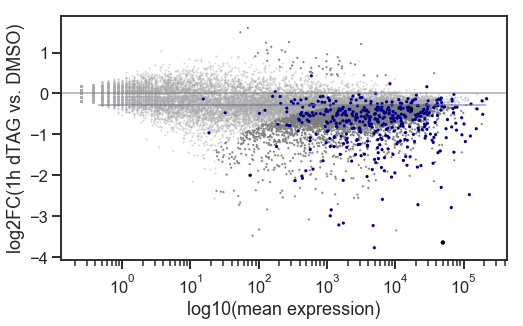

In [56]:
# make scatter plot manually
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(8,4.5))

# for plotting kernel density colormap
#xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
#z = sc.stats.gaussian_kde(xy)(xy)

# plotting all individual
plt.axhline(color="grey",alpha=0.5, linewidth=2)
plt.axhline(xmin=0.085, xmax=0.95, y=DEseq_TT_1h_df.log2FoldChange.median(), color="#666f96",alpha=0.5, linewidth=2)
plt.scatter(x=DEseq_TT_1h_df.baseMean, y=DEseq_TT_1h_df.log2FoldChange, s=4, c="#aaaaaa", alpha=0.5, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)
plt.scatter(x=DEseq_TT_1h_df.baseMean[DEseq_TT_1h_df.padj < 0.01], y=DEseq_TT_1h_df.log2FoldChange[DEseq_TT_1h_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
plt.scatter(x=SE_DEseq.baseMean, y=SE_DEseq.log2FoldChange, s=10, c="darkblue", edgecolors="none")
plt.scatter(x=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_012233')].baseMean, y=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_012233')].log2FoldChange, s=20, c="black", edgecolors="none")
plt.scatter(x=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_001161660')].baseMean, y=DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_001161660')].log2FoldChange, s=20, c="black", edgecolors="none")
#plt.axhline(color="grey",alpha=0.5, linewidth=2)
#plt.axhline(y=DEseq_TT_1h_df.log2FoldChange.median(), color="#666f96",alpha=0.5, linewidth=2)

# formatting
plt.xscale('log')
plt.xlabel('log10(mean expression)')
plt.ylabel('log2FC(1h dTAG vs. DMSO)')

# save
#plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_scatter\\{0}_1h_scatterplot.png'.format(all_set_names[counter]), dpi=300)
plt.show()

In [29]:
DEseq_TT_1h_df[DEseq_TT_1h_df.transcript_id.str.contains('NM_001161660')]

,chr,strand,start,end,type,source,length,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,transcript_id
TR07987,chr6,+,135181315,135219173,transcribed_region,REFSEQ_merge,37859,TR07987,49724.75,-3.639578,0.11294,-32.225623,7.725228e-228,1.057661e-223,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...


In [18]:
z.max()

0.00019544633513214832

In [3]:
DEseq_TT_1h_df = pd.read_csv('S:\\lab_winter\\martin\\MJ-19-1\\20190418_JaegerWinter2019TTseqKBM7\\DifferentialExpression\\differential.expression.estimates_1h.txt', sep="\t")


In [4]:
DEseq_TT_1h_df

,chr,strand,start,end,type,source,length,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,transcript_id
TR00001,chr1,+,11874,14409,transcribed_region,REFSEQ_merge,2536,TR00001,0.250,-1.809406e-01,0.167947,-1.077369e+00,2.813155e-01,NaN,ENSG00000223972,NR_046018
TR00004,chr1,+,817371,819834,transcribed_region,REFSEQ_merge,2464,TR00004,0.750,-1.245698e-01,0.228550,-5.450441e-01,5.857232e-01,NaN,ENSG00000177757,NR_103536
TR00005,chr1,+,827591,859446,transcribed_region,REFSEQ_merge,31856,TR00005,2317.375,-8.716611e-02,0.106632,-8.174489e-01,4.136720e-01,4.841910e-01,NA ENSG00000228794,NR_047526 NR_047525 NR_047524 NR_047523 NR_047...
TR00006,chr1,+,925741,944581,transcribed_region,REFSEQ_merge,18841,TR00006,4.625,-3.093797e-01,0.463727,-6.671594e-01,5.046704e-01,NaN,ENSG00000187634,NM_152486
TR00007,chr1,+,960587,965719,transcribed_region,REFSEQ_merge,5133,TR00007,93.000,-1.856987e-01,0.278255,-6.673692e-01,5.045364e-01,5.702569e-01,ENSG00000187961,NM_198317
TR00008,chr1,+,966497,975104,transcribed_region,REFSEQ_merge,8608,TR00008,1.250,-1.401499e-16,0.323428,-4.333262e-16,1.000000e+00,NaN,ENSG00000187583,NM_032129 NM_001160184
TR00009,chr1,+,1013467,1014539,transcribed_region,REFSEQ_merge,1073,TR00009,74.000,-2.234840e-01,0.313525,-7.128117e-01,4.759623e-01,5.429428e-01,ENSG00000187608,NM_005101
TR00010,chr1,+,1020123,1056119,transcribed_region,REFSEQ_merge,35997,TR00010,428.125,1.813637e-01,0.185163,9.794824e-01,3.273417e-01,3.990059e-01,ENSG00000188157,NM_001305275 NM_198576
TR00015,chr1,+,1173906,1197933,transcribed_region,REFSEQ_merge,24028,TR00015,1.625,-6.038511e-02,0.340565,-1.773088e-01,8.592659e-01,NaN,ENSG00000162571,NM_001130045 NM_153254
TR00016,chr1,+,1232249,1235040,transcribed_region,REFSEQ_merge,2792,TR00016,136.250,-4.950364e-01,0.270850,-1.827714e+00,6.759252e-02,1.049265e-01,ENSG00000176022,NM_080605
